In [2]:
%load_ext autoreload
%autoreload 2

# Mengen und Flächen ermitteln 
In diesem Notebook werden Flächen und Mengen des Modells ermittelt

## Einlesen des Modell

In [44]:
import ifcopenshell
#m = ifcopenshell.open("../data/AC-20-Smiley-West-10-Bldg.ifc")
m = ifcopenshell.open("../data/231110AC-11-Smiley-West-04-07-2007.ifc")

Auswählen aller Räume, die in IFC mit ["IfcSpace"](https://standards.buildingsmart.org/IFC/RELEASE/IFC4_1/FINAL/HTML/schema/ifcproductextension/lexical/ifcspace.htm) modelliert werden.

In [45]:
raeume = m.by_type("IfcSpace")

Anzahl der Wände im gesammten Gebäude: `len`ermittelt die Größe von Sequenztypen, siehe [Dokumentation hier](https://docs.python.org/3.8/library/functions.html#len)

In [46]:
# Auswahl eines zufälligen Raumes
r = raeume[30]

In [47]:
r.IsDefinedBy[1].RelatingPropertyDefinition

#146543=IfcPropertySet('0uZdJe9WXAwPGLQUvlH7Qq',#29,'Pset_SpaceCommon',$,(#146549,#146554))

In [48]:
r.get_info()

{'id': 146518,
 'type': 'IfcSpace',
 'GlobalId': '0Jcz4wXEPA1B4wLG0OYqai',
 'OwnerHistory': #29=IfcOwnerHistory(#28,#5,$,.NOCHANGE.,$,$,$,1183627578),
 'Name': '1.2.1',
 'Description': None,
 'ObjectType': None,
 'ObjectPlacement': #146515=IfcLocalPlacement(#84758,#146512),
 'Representation': #146500=IfcProductDefinitionShape($,$,(#146494)),
 'LongName': 'ZIMMER-1-1',
 'CompositionType': 'ELEMENT',
 'InteriorOrExteriorSpace': 'INTERNAL',
 'ElevationWithFlooring': None}

In [49]:
m.get_inverse(r)

[#27812=IfcRelAssociatesClassification('1IxZ$aeiD8J9HIv10ZyNJ2',#29,$,$,(#27799,#28053,#28177,#28553,#28929,#29181,#82837,#82981,#83121,#83261,#83405,#83529,#83657,#83785,#83913,#84037,#84165,#84289,#84417,#84541,#84670,#146518,#146646,#146770,#146908,#147046,#147185,#147319,#147453,#147587,#147721,#147855,#147979,#148113,#148247,#148381,#148515,#148648,#148786,#148924,#149062,#168466,#168604,#168742,#168880,#169018,#169156,#169294,#169432,#169570,#169708,#169847,#169985,#170123,#170261,#170399,#170537,#170675,#170813,#170951,#171089),#27811),
 #146540=IfcRelDefinesByProperties('0F3BttQV985vK8JOZOreIi',#29,$,$,(#146518),#146535),
 #146547=IfcRelDefinesByProperties('05pV3OLhj8_OqeUq5mG4LE',#29,$,$,(#146518),#146543),
 #146563=IfcRelDefinesByProperties('2K5l4eIWP61hxyHLOIcdvA',#29,$,$,(#146518),#146559),
 #149151=IfcRelAggregates('2aWM_sdm941BYbwbf1Wxoy',#29,'BuildingStoreyContainer','BuildingStoreyContainer for Spaces',#84761,(#146518,#146646,#146770,#146908,#147046,#147185,#147319,#147

## Alle PSets eines Raumes einlesen

In [50]:
import ifcopenshell.util.element

In [51]:
ifcopenshell.util.element.get_psets(r)

{None: {'NetVolume': 39.002478, 'NetFootprintArea': 15.477174},
 'Pset_SpaceCommon': {'Category': 'Schlafraum', 'HandicapAccessible': False},
 'Pset_SpaceThermalRequirements': {'SpaceTemperatureMax': 20.0,
  'SpaceTemperatureMin': 20.0,
  'SpaceTemperatureSummerMax': 20.0,
  'SpaceTemperatureSummerMin': 20.0,
  'NaturalVentilation': True,
  'AirConditioning': False}}

In [20]:
r.get_info()

{'id': 146518,
 'type': 'IfcSpace',
 'GlobalId': '0Jcz4wXEPA1B4wLG0OYqai',
 'OwnerHistory': #29=IfcOwnerHistory(#28,#5,$,.NOCHANGE.,$,$,$,1183627578),
 'Name': '1.2.1',
 'Description': None,
 'ObjectType': None,
 'ObjectPlacement': #146515=IfcLocalPlacement(#84758,#146512),
 'Representation': #146500=IfcProductDefinitionShape($,$,(#146494)),
 'LongName': 'ZIMMER-1-1',
 'CompositionType': 'ELEMENT',
 'InteriorOrExteriorSpace': 'INTERNAL',
 'ElevationWithFlooring': None}

## Außenwände finden.
Aussenwände sollten in einem IFC-Modell durch den Wert `True` für die Eigenschaft(_eng. Property_) **IsExternal**  im Standard-Pset "Pset_WallCommon" gekennzeichnet werden. 
Alle Außenwände lassen könnenen also gefunden werden, wenn die Liste aller Wände durchlaufen werden und nach dieser Eigenschaft durchsucht werden.

Da die zulässigen Werte für **IsExternal** die Strings "True" oder "False" sind, können wir die Standard-Funktion `bool` verwernden, um die Variable in den entsprechenden Datenytpen zu wandeln.

In [10]:
walls = m.by_type("IfcWall")
len(walls)

281

In [11]:
ausssenwaende = []
for w in walls:
    psets = ifcopenshell.util.element.get_psets(w)
    if psets.get("Pset_WallCommon"):
        # wenn es das Pset gibt, versuche den Wert "isExternal"
        # zu finden und ihn in den Datentypen bool zu wandeln
        if bool(psets.get("Pset_WallCommon").get("IsExternal")):
            # Füge der List der Aussenwände hinzu
            ausssenwaende.append(w)

len (ausssenwaende)


152

In [14]:
wand=ausssenwaende[0]

In [28]:
m.get_inverse(wand)

[#10969=IfcRelContainedInSpatialStructure('1QPtU1ucskO7mlP9ScHMsN',#12,$,$,(#10954,#11059,#11130,#11201,#11272,#11373,#11497,#11586,#11675,#11764,#11873,#12402,#12514,#12827,#12935,#13044,#13152,#13256,#13409,#13504,#14002,#14097,#14241,#14335,#14479,#14574,#14718,#14812,#14929,#15043,#15147,#15256,#15405,#15500,#15612,#15764,#15859,#15963,#16116,#16210,#16363,#16458,#16624,#16728,#16883,#16978,#17131,#17225,#17369,#17463,#17615,#17709,#17861,#17955,#18104,#18199,#18352,#18446,#18557,#18713,#21073,#21144,#21215,#21286,#21357,#21448,#21537,#21626,#21715,#21804,#21903,#22047,#22142,#22286,#22380,#22489,#22597,#22701,#22854,#22949,#23101,#23196,#23340,#23434,#23578,#23673,#23817,#23911,#24028,#24142,#24246,#24355,#24504,#24599,#24711,#24863,#24958,#25062,#25215,#25309,#25462,#25557,#25706,#25800,#25955,#26050,#26203,#26297,#26441,#26535,#26687,#26781,#26933,#27027,#27176,#27271,#27424,#27518,#27629,#27785),#9157),
 #11898=IfcRelAssociatesMaterial('2sOYdjookGHbY2YQhBc4rS',#12,$,$,(#11873),

In [29]:
material = m.by_id(11877)
material

#11877=IfcMaterial('Stahlbeton 2816491304',$,$)

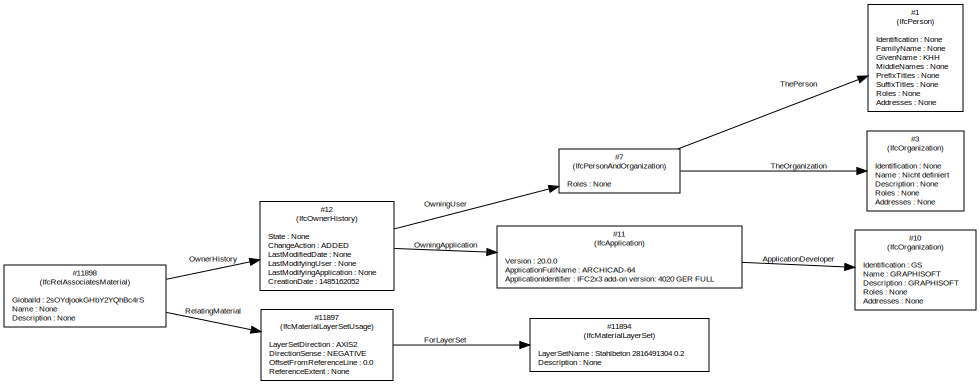

In [27]:
from utils import IfcGraphViz
graph = IfcGraphViz.IfcGraphViz().plot_graph(m,m.by_id(11898))
graph

### Alle Properties in einen Pandas DataFrame
(nur für Interessierte und Fortgeschrittene=

In [30]:
import pandas as pd
elements = m.by_type("IfcElement")
df = pd.DataFrame()
#df = pd.DataFrame({"element_id":[],"pset":[], "name":[], "value":[]})


for elem in elements:
    psets = ifcopenshell.util.element.get_psets(elem)
    for psetname, props in psets.items():
        for name, value in props.items():
            
            data = {"element_id":elem.id(),"elem-name":elem.Name, "type":elem.is_a(), "pset":psetname, "name":name, "value":value}

            df = df.append(data, ignore_index=True)
df = df.astype({"element_id":"int32"})

In [31]:
df.tail()

elem-name  element_id         name            pset     type      value
8731    Dach-4      157012    Perimeter  BaseQuantities  IfcSlab     29.666
8732    Dach-4      157012    GrossArea  BaseQuantities  IfcSlab   54.99664
8733    Dach-4      157012      NetArea  BaseQuantities  IfcSlab   54.99664
8734    Dach-4      157012  GrossVolume  BaseQuantities  IfcSlab  10.999328
8735    Dach-4      157012    NetVolume  BaseQuantities  IfcSlab  10.999328

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elem-name   1705 non-null   object 
 1   element_id  1705 non-null   int32  
 2   name        1705 non-null   object 
 3   pset        1011 non-null   object 
 4   type        1705 non-null   object 
 5   value       1705 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 73.4+ KB


In [29]:
external = df[(df.name=="IsExternal") & (df.value == "False")]

In [30]:
has_external = df[(df.name=="IsExternal")]

In [31]:
external

Empty DataFrame
Columns: [elem-name, element_id, name, pset, type, value]
Index: []

In [32]:
is_external = has_external[has_external.value.astype("string").str.contains("True")]

In [33]:
is_external

Empty DataFrame
Columns: [elem-name, element_id, name, pset, type, value]
Index: []

In [34]:
external_walls= is_external[is_external.type.str.match("IfcWall")]

In [35]:
external_walls

Empty DataFrame
Columns: [elem-name, element_id, name, pset, type, value]
Index: []